In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore


data = pd.read_csv('C:/Users/raileyshahril.abdull/OneDrive - PETRONAS/Desktop/C3.AI/Exmachina/Test_Jupyter.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data

C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Molar Monosodium PO4 (moles MSP/L),Molar Disodium PO4 (moles DSP/L),Molar Trisodium PO4 (moles TSP/L),Molar Sodium (moles Na/L),Hydroxide (ppm as OH),Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,2.440000e-07,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,2.662772
2021-01-02,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,2.440000e-07,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,2.662772
2021-01-03,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,2.440000e-07,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,2.662772
2021-01-04,9.983334,9.5,10.5,9.700000,3,30,1.040000e-10,0.000096,0.005888,6.170000e-08,...,1.710000e-07,0.000005,0.000097,0.000301,1.636671,4.811812,4.390000e-10,0.016750,5.021654,2.945123
2021-01-05,9.973334,9.5,10.5,9.900000,3,30,1.060000e-10,0.000094,0.005888,6.170000e-08,...,1.790000e-07,0.000010,0.000095,0.000303,1.599416,4.702283,4.690000e-10,0.017494,5.125528,2.904931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.780000,9.5,10.5,9.433334,3,30,1.660000e-10,0.000060,0.005888,6.170000e-08,...,2.660000e-07,0.000039,0.000061,0.000259,1.024774,3.012835,1.090000e-09,0.026034,4.887078,2.606823
2021-12-28,9.856667,9.5,10.5,9.933334,3,30,1.390000e-10,0.000072,0.005888,6.170000e-08,...,2.350000e-07,0.000032,0.000072,0.000281,1.222628,3.594526,8.060000e-10,0.022975,5.145490,2.688502
2021-12-29,9.880000,9.5,10.5,10.633333,3,30,1.320000e-10,0.000076,0.005888,6.170000e-08,...,2.380000e-07,0.000036,0.000076,0.000300,1.290113,3.792933,7.750000e-10,0.023306,5.507698,2.679002


In [2]:
# Remove outliers using Z-score for the 'PO4' column
z_scores = zscore(data['PO4'])
data['PO4_z_score'] = z_scores
data = data[np.abs(z_scores) < 2]  # Adjust the threshold as needed

data


,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Molar Disodium PO4 (moles DSP/L),Molar Trisodium PO4 (moles TSP/L),Molar Sodium (moles Na/L),Hydroxide (ppm as OH),Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4,PO4_z_score
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,2.662772,-0.589346
2021-01-02,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,2.662772,-0.589346
2021-01-03,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,2.662772,-0.589346
2021-01-04,9.983334,9.5,10.5,9.700000,3,30,1.040000e-10,0.000096,0.005888,6.170000e-08,...,0.000005,0.000097,0.000301,1.636671,4.811812,4.390000e-10,0.016750,5.021654,2.945123,0.567872
2021-01-05,9.973334,9.5,10.5,9.900000,3,30,1.060000e-10,0.000094,0.005888,6.170000e-08,...,0.000010,0.000095,0.000303,1.599416,4.702283,4.690000e-10,0.017494,5.125528,2.904931,0.403145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.780000,9.5,10.5,9.433334,3,30,1.660000e-10,0.000060,0.005888,6.170000e-08,...,0.000039,0.000061,0.000259,1.024774,3.012835,1.090000e-09,0.026034,4.887078,2.606823,-0.818653
2021-12-28,9.856667,9.5,10.5,9.933334,3,30,1.390000e-10,0.000072,0.005888,6.170000e-08,...,0.000032,0.000072,0.000281,1.222628,3.594526,8.060000e-10,0.022975,5.145490,2.688502,-0.483889
2021-12-29,9.880000,9.5,10.5,10.633333,3,30,1.320000e-10,0.000076,0.005888,6.170000e-08,...,0.000036,0.000076,0.000300,1.290113,3.792933,7.750000e-10,0.023306,5.507698,2.679002,-0.522825


In [20]:
# Split the data into training and testing sets
train_size = int(0.8 * len(data))
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

In [21]:
model = sm.tsa.ARIMA(train_data['PO4'], order=(2,1,2))
fit_model = model.fit(disp=-1)

C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [59]:
forecast_values = fit_model.forecast(steps=len(test_data))

In [60]:
forecast_values_pred = forecast_values[0]
forecast_stderr = forecast_values[1]
forecast_conf_int = forecast_values[2]

In [64]:
forecast_df = pd.DataFrame({
    'Forecasted_Value': forecast_values_pred,
    'Std_Errors': forecast_stderr,
    'Confidence_Interval_Lower': forecast_conf_int[:, 0],
    'Confidence_Interval_Upper': forecast_conf_int[:, 1]
}, index=test_data.index)

In [65]:
merged_df = pd.concat([test_data, forecast_df], axis=1)

In [66]:
merged_df

,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4,PO4_z_score,Forecasted_Value,Std_Errors,Confidence_Interval_Lower,Confidence_Interval_Upper
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-22,10.080000,9.5,10.5,12.066667,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,6.011391,3.490000e-10,0.016665,6.241832,2.950619,0.590397,2.985628,0.128596,2.733584,3.237672
2021-10-23,10.080000,9.5,10.5,12.300000,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,6.011391,3.560000e-10,0.016987,6.362531,2.932668,0.516827,2.980480,0.186987,2.613993,3.346968
2021-10-24,10.080000,9.5,10.5,12.300000,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,6.011391,3.560000e-10,0.016987,6.362531,2.932668,0.516827,2.981012,0.205236,2.578756,3.383268
2021-10-25,10.020000,9.5,10.5,11.966667,3,30,9.550000e-11,0.000105,0.005888,6.170000e-08,...,5.235701,4.570000e-10,0.018986,6.193442,2.834472,0.114367,2.981334,0.213087,2.563690,3.398977
2021-10-26,9.936666,9.5,10.5,11.533333,3,30,1.160000e-10,0.000086,0.005888,6.170000e-08,...,4.321570,6.470000e-10,0.022181,5.972415,2.713955,-0.379570,2.982009,0.216487,2.557703,3.406315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.780000,9.5,10.5,9.433334,3,30,1.660000e-10,0.000060,0.005888,6.170000e-08,...,3.012835,1.090000e-09,0.026034,4.887078,2.606823,-0.818653,3.056791,0.219196,2.627176,3.486407
2021-12-28,9.856667,9.5,10.5,9.933334,3,30,1.390000e-10,0.000072,0.005888,6.170000e-08,...,3.594526,8.060000e-10,0.022975,5.145490,2.688502,-0.483889,3.058016,0.219196,2.628400,3.487632
2021-12-29,9.880000,9.5,10.5,10.633333,3,30,1.320000e-10,0.000076,0.005888,6.170000e-08,...,3.792933,7.750000e-10,0.023306,5.507698,2.679002,-0.522825,3.059240,0.219196,2.629624,3.488856


In [69]:
rmse = np.sqrt(mean_squared_error(merged_df['PO4'], merged_df['Forecasted_Value']))
print(f'Root Mean Squared Error (RMSE) for PO4: {rmse}')

Root Mean Squared Error (RMSE) for PO4: 0.2991302176335254


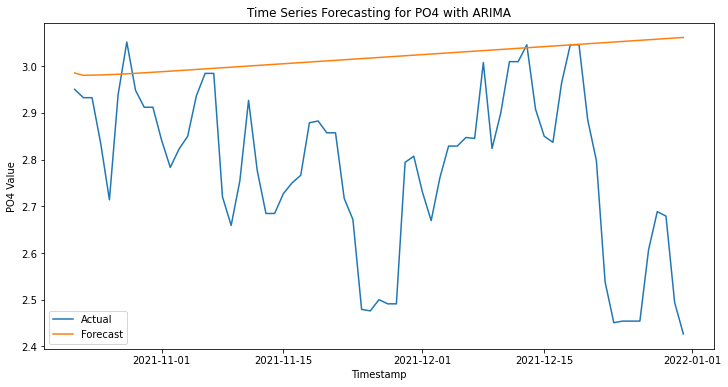

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['PO4'], label='Actual')
plt.plot(merged_df.index, merged_df['Forecasted_Value'], label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel('PO4 Value')
plt.title('Time Series Forecasting for PO4 with ARIMA')
plt.legend()
plt.show()

In [70]:
p_values = range(0, 4)  # Try values from 0 to 3
d_values = range(0, 2)  # Typically, d is 0 or 1
q_values = range(0, 4)  # Try values from 0 to 3
results = []

In [71]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = sm.tsa.ARIMA(train_data['PO4'], order=(p, d, q))
                fit_model = model.fit(disp=-1)
                results.append({'p': p, 'd': d, 'q': q, 'aic': fit_model.aic})
            except:
                continue

C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: Val

In [72]:
results_df = pd.DataFrame(results)

In [73]:
best_params = results_df.sort_values(by='aic').iloc[0]
print("Best Parameters:", best_params)

Best Parameters: p        2.00000
d        0.00000
q        2.00000
aic   -346.00473
Name: 18, dtype: float64


In [74]:
model = sm.tsa.ARIMA(train_data['PO4'], order=(2,0,2))
fit_model = model.fit(disp=-1)

C:\Users\raileyshahril.abdull\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [75]:
forecast_values = fit_model.forecast(steps=len(test_data))
forecast_values_pred = forecast_values[0]
forecast_stderr = forecast_values[1]
forecast_conf_int = forecast_values[2]
forecast_df = pd.DataFrame({
    'Forecasted_Value': forecast_values_pred,
    'Std_Errors': forecast_stderr,
    'Confidence_Interval_Lower': forecast_conf_int[:, 0],
    'Confidence_Interval_Upper': forecast_conf_int[:, 1]
}, index=test_data.index)
merged_df = pd.concat([test_data, forecast_df], axis=1)
merged_df

,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4,PO4_z_score,Forecasted_Value,Std_Errors,Confidence_Interval_Lower,Confidence_Interval_Upper
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-22,10.080000,9.5,10.5,12.066667,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,6.011391,3.490000e-10,0.016665,6.241832,2.950619,0.590397,2.961900,0.128498,2.710049,3.213751
2021-10-23,10.080000,9.5,10.5,12.300000,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,6.011391,3.560000e-10,0.016987,6.362531,2.932668,0.516827,2.930629,0.185844,2.566381,3.294876
2021-10-24,10.080000,9.5,10.5,12.300000,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,6.011391,3.560000e-10,0.016987,6.362531,2.932668,0.516827,2.913852,0.202338,2.517276,3.310427
2021-10-25,10.020000,9.5,10.5,11.966667,3,30,9.550000e-11,0.000105,0.005888,6.170000e-08,...,5.235701,4.570000e-10,0.018986,6.193442,2.834472,0.114367,2.903951,0.209395,2.493545,3.314356
2021-10-26,9.936666,9.5,10.5,11.533333,3,30,1.160000e-10,0.000086,0.005888,6.170000e-08,...,4.321570,6.470000e-10,0.022181,5.972415,2.713955,-0.379570,2.897354,0.213368,2.479160,3.315548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.780000,9.5,10.5,9.433334,3,30,1.660000e-10,0.000060,0.005888,6.170000e-08,...,3.012835,1.090000e-09,0.026034,4.887078,2.606823,-0.818653,2.813321,0.237998,2.346854,3.279787
2021-12-28,9.856667,9.5,10.5,9.933334,3,30,1.390000e-10,0.000072,0.005888,6.170000e-08,...,3.594526,8.060000e-10,0.022975,5.145490,2.688502,-0.483889,2.813061,0.238007,2.346576,3.279546
2021-12-29,9.880000,9.5,10.5,10.633333,3,30,1.320000e-10,0.000076,0.005888,6.170000e-08,...,3.792933,7.750000e-10,0.023306,5.507698,2.679002,-0.522825,2.812812,0.238015,2.346311,3.279313


In [76]:
rmse = np.sqrt(mean_squared_error(merged_df['PO4'], merged_df['Forecasted_Value']))
print(f'Root Mean Squared Error (RMSE) for PO4: {rmse}')

Root Mean Squared Error (RMSE) for PO4: 0.17551427297241326


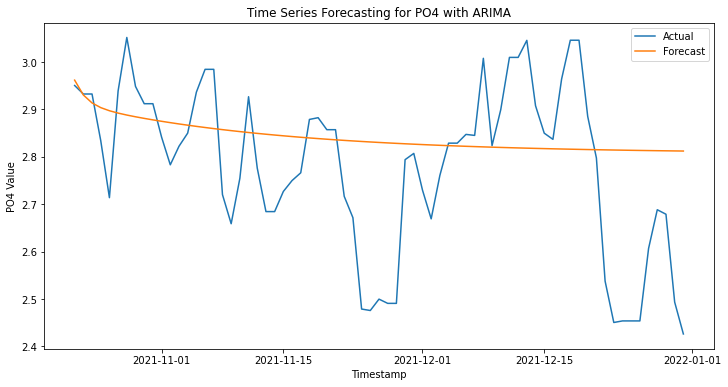

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['PO4'], label='Actual')
plt.plot(merged_df.index, merged_df['Forecasted_Value'], label='Forecast')
plt.xlabel('Timestamp')
plt.ylabel('PO4 Value')
plt.title('Time Series Forecasting for PO4 with ARIMA')
plt.legend()
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

X = data.drop(columns=['PO4'])
y = data['PO4']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)


In [5]:
time_steps = 10  # Number of previous time steps to consider
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps + 1):
        end_idx = i + time_steps
        X_seq.append(X[i:end_idx, :])
        y_seq.append(y[end_idx - 1])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

In [6]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [7]:
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)

Epoch 1/50
9/9 [==============================] - 1s 5ms/step - loss: 0.1227
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0605
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0345
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0288
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0259
Epoch 7/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0224
Epoch 8/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0198
Epoch 9/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0145
Epoch 11/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 12/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 13/50
9/9 [==============================] - 0s 5ms/step - loss: 0.

In [8]:
y_pred_scaled = model.predict(X_test_seq)

2/2 [==============================] - 0s 12ms/step


In [9]:
y_pred = scaler.inverse_transform(y_pred_scaled)

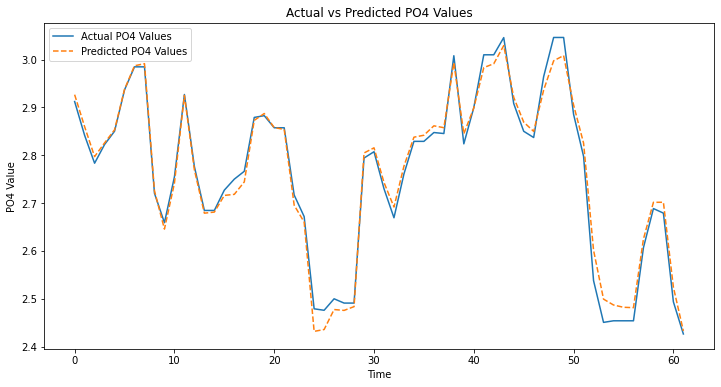

In [13]:
y_test_original = scaler.inverse_transform(y_test_seq)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual PO4 Values')
plt.plot(y_pred, label='Predicted PO4 Values', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('PO4 Value')
plt.title('Actual vs Predicted PO4 Values')
plt.legend()
plt.show()

In [14]:
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.021752215192323215


In [15]:
merged_data = np.concatenate((y_test_original, y_pred, X_test_seq.reshape((-1, X_train.shape[1]))), axis=1)
print("Merged Data Shape:", merged_data.shape)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 62 and the array at index 2 has size 620

In [45]:
y_test_original

array([[2.9121904 ],
       [2.8415629 ],
       [2.78330282],
       [2.82238996],
       [2.8501533 ],
       [2.93657183],
       [2.98471473],
       [2.98471473],
       [2.72037122],
       [2.65897523],
       [2.75475915],
       [2.92692261],
       [2.77634298],
       [2.68457491],
       [2.68457491],
       [2.7270212 ],
       [2.75001109],
       [2.76642651],
       [2.87899635],
       [2.88268391],
       [2.85738289],
       [2.85738289],
       [2.71678585],
       [2.67170312],
       [2.47899852],
       [2.47591081],
       [2.49990871],
       [2.49097075],
       [2.49097075],
       [2.79412425],
       [2.80733773],
       [2.72996261],
       [2.66927761],
       [2.7609263 ],
       [2.8289783 ],
       [2.8289783 ],
       [2.84742733],
       [2.84532397],
       [3.00795349],
       [2.82378284],
       [2.89956265],
       [3.00989454],
       [3.00989454],
       [3.04585268],
       [2.90794475],
       [2.85005739],
       [2.83699697],
       [2.964

In [59]:
result_df = pd.DataFrame({'Actual_PO4': y_test_original.flatten(), 'Predicted_PO4': y_pred.flatten()})
X_test_original = scaler.inverse_transform(X_test.reshape(-1, X_test.shape[1]))  # Use X_test.shape[1] instead of X_test_seq.shape[1]
X_test_df = pd.DataFrame(X_test_original, columns=X.columns)
result_df = pd.concat([X_test_df,result_df], axis=1)
result_df

,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Molar Trisodium PO4 (moles TSP/L),Molar Sodium (moles Na/L),Hydroxide (ppm as OH),Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4_z_score,Actual_PO4,Predicted_PO4
0,3.064149,2.359104,2.359104,2.841422,2.359104,2.359104,2.458922,2.903610,2.359104,2.359104,...,2.903247,2.965413,2.903554,2.903554,2.359104,2.707876,2.905897,2.950619,2.912190,2.926558
1,3.064149,2.359104,2.359104,2.853835,2.359104,2.359104,2.458922,2.903610,2.359104,2.359104,...,2.903332,2.976068,2.903554,2.903554,2.359104,2.714621,2.916470,2.932668,2.841563,2.859764
2,3.064149,2.359104,2.359104,2.853835,2.359104,2.359104,2.458922,2.903610,2.359104,2.359104,...,2.903332,2.976068,2.903554,2.903554,2.359104,2.714621,2.916470,2.932668,2.783303,2.797132
3,2.991213,2.359104,2.359104,2.836102,2.359104,2.359104,2.502460,2.808300,2.359104,2.359104,...,2.808065,2.927021,2.808226,2.808226,2.359104,2.756444,2.901657,2.834472,2.822390,2.825744
4,2.889913,2.359104,2.359104,2.813050,2.359104,2.359104,2.575023,2.695787,2.359104,2.359104,...,2.695642,2.867365,2.695885,2.695885,2.359104,2.823313,2.882295,2.713955,2.850153,2.853076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2.699471,2.359104,2.359104,2.701337,2.359104,2.359104,2.752007,2.535433,2.359104,2.359104,...,2.534689,2.714483,2.535049,2.535049,2.359104,2.903956,2.787218,2.606823,NaN,NaN
67,2.792666,2.359104,2.359104,2.727935,2.359104,2.359104,2.656436,2.606701,2.359104,2.359104,...,2.606021,2.762666,2.606535,2.606535,2.359104,2.839932,2.809856,2.688502,NaN,NaN
68,2.821030,2.359104,2.359104,2.765173,2.359104,2.359104,2.631658,2.631277,2.359104,2.359104,...,2.631017,2.803245,2.630918,2.630918,2.359104,2.846857,2.841585,2.679002,NaN,NaN
69,2.768355,2.359104,2.359104,2.903485,2.359104,2.359104,2.681213,2.587041,2.359104,2.359104,...,2.587121,2.906055,2.586654,2.586654,2.359104,3.029891,2.959631,2.493625,NaN,NaN


In [60]:
y_test_original

array([[2.9121904 ],
       [2.8415629 ],
       [2.78330282],
       [2.82238996],
       [2.8501533 ],
       [2.93657183],
       [2.98471473],
       [2.98471473],
       [2.72037122],
       [2.65897523],
       [2.75475915],
       [2.92692261],
       [2.77634298],
       [2.68457491],
       [2.68457491],
       [2.7270212 ],
       [2.75001109],
       [2.76642651],
       [2.87899635],
       [2.88268391],
       [2.85738289],
       [2.85738289],
       [2.71678585],
       [2.67170312],
       [2.47899852],
       [2.47591081],
       [2.49990871],
       [2.49097075],
       [2.49097075],
       [2.79412425],
       [2.80733773],
       [2.72996261],
       [2.66927761],
       [2.7609263 ],
       [2.8289783 ],
       [2.8289783 ],
       [2.84742733],
       [2.84532397],
       [3.00795349],
       [2.82378284],
       [2.89956265],
       [3.00989454],
       [3.00989454],
       [3.04585268],
       [2.90794475],
       [2.85005739],
       [2.83699697],
       [2.964

In [39]:
result_df

,Actual_PO4,Predicted_PO4
0,0.598674,2.926558
1,0.522225,2.859764
2,0.459163,2.797132
3,0.501472,2.825744
4,0.531524,2.853076
...,...,...
57,0.268137,2.624907
58,0.356549,2.701560
59,0.346266,2.701689
60,0.145608,2.524182


In [48]:
y_test_original = scaler.inverse_transform(y_test_seq)

In [49]:
y_test_original

array([[2.9121904 ],
       [2.8415629 ],
       [2.78330282],
       [2.82238996],
       [2.8501533 ],
       [2.93657183],
       [2.98471473],
       [2.98471473],
       [2.72037122],
       [2.65897523],
       [2.75475915],
       [2.92692261],
       [2.77634298],
       [2.68457491],
       [2.68457491],
       [2.7270212 ],
       [2.75001109],
       [2.76642651],
       [2.87899635],
       [2.88268391],
       [2.85738289],
       [2.85738289],
       [2.71678585],
       [2.67170312],
       [2.47899852],
       [2.47591081],
       [2.49990871],
       [2.49097075],
       [2.49097075],
       [2.79412425],
       [2.80733773],
       [2.72996261],
       [2.66927761],
       [2.7609263 ],
       [2.8289783 ],
       [2.8289783 ],
       [2.84742733],
       [2.84532397],
       [3.00795349],
       [2.82378284],
       [2.89956265],
       [3.00989454],
       [3.00989454],
       [3.04585268],
       [2.90794475],
       [2.85005739],
       [2.83699697],
       [2.964

In [66]:
X_test_original = scaler.inverse_transform(X_scaled)
X_test_original

array([[2.76025001, 2.35910398, 2.35910398, ..., 2.85840256, 2.79929455,
        2.66277185],
       [2.76025001, 2.35910398, 2.35910398, ..., 2.85840256, 2.79929455,
        2.66277185],
       [2.76025001, 2.35910398, 2.35910398, ..., 2.85840256, 2.79929455,
        2.66277185],
       ...,
       [2.82102996, 2.35910398, 2.35910398, ..., 2.84685702, 2.84158538,
        2.67900243],
       [2.76835455, 2.35910398, 2.35910398, ..., 3.02989134, 2.9596308 ,
        2.49362459],
       [2.73593873, 2.35910398, 2.35910398, ..., 3.13528793, 3.01260393,
        2.42639701]])

In [68]:
X

,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Molar Monosodium PO4 (moles MSP/L),Molar Disodium PO4 (moles DSP/L),Molar Trisodium PO4 (moles TSP/L),Molar Sodium (moles Na/L),Hydroxide (ppm as OH),Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4_z_score
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,2.440000e-07,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,-0.589346
2021-01-02,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,2.440000e-07,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,-0.589346
2021-01-03,9.830000,9.5,10.5,9.700000,3,30,1.480000e-10,0.000068,0.005888,6.170000e-08,...,2.440000e-07,0.000034,0.000068,0.000272,1.149814,3.380453,8.900000e-10,0.023857,5.024933,-0.589346
2021-01-04,9.983334,9.5,10.5,9.700000,3,30,1.040000e-10,0.000096,0.005888,6.170000e-08,...,1.710000e-07,0.000005,0.000097,0.000301,1.636671,4.811812,4.390000e-10,0.016750,5.021654,0.567872
2021-01-05,9.973334,9.5,10.5,9.900000,3,30,1.060000e-10,0.000094,0.005888,6.170000e-08,...,1.790000e-07,0.000010,0.000095,0.000303,1.599416,4.702283,4.690000e-10,0.017494,5.125528,0.403145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.780000,9.5,10.5,9.433334,3,30,1.660000e-10,0.000060,0.005888,6.170000e-08,...,2.660000e-07,0.000039,0.000061,0.000259,1.024774,3.012835,1.090000e-09,0.026034,4.887078,-0.818653
2021-12-28,9.856667,9.5,10.5,9.933334,3,30,1.390000e-10,0.000072,0.005888,6.170000e-08,...,2.350000e-07,0.000032,0.000072,0.000281,1.222628,3.594526,8.060000e-10,0.022975,5.145490,-0.483889
2021-12-29,9.880000,9.5,10.5,10.633333,3,30,1.320000e-10,0.000076,0.005888,6.170000e-08,...,2.380000e-07,0.000036,0.000076,0.000300,1.290113,3.792933,7.750000e-10,0.023306,5.507698,-0.522825


In [69]:
X_train_TT, X_test_TT = train_test_split(X, test_size=0.2, shuffle=False)

In [70]:
X_test_TT

,BW pH,Item A,Item B,BW Phosphate,Item C,Item D,Molar Hydrogen (moles H/L),Molar Hydroxide (moles OH/L),K1 (First Dissociation Constant for H3PO4),K2 (Second Dissociation Constant for H3PO4),...,Molar Monosodium PO4 (moles MSP/L),Molar Disodium PO4 (moles DSP/L),Molar Trisodium PO4 (moles TSP/L),Molar Sodium (moles Na/L),Hydroxide (ppm as OH),Hydroxide (ppm as CaCO3),Hydroxide Neutralized by Triprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Diprotic PO4 (ppm as CaCO3),Hydroxide Neutralized by Monoprotic PO4 (ppm as CaCO3),PO4_z_score
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-22,10.080000,9.5,10.5,12.066667,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,1.700000e-07,0.000006,0.000121,0.000375,2.044691,6.011391,3.490000e-10,0.016665,6.241832,0.590397
2021-10-23,10.080000,9.5,10.5,12.300000,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,1.740000e-07,0.000008,0.000121,0.000380,2.044691,6.011391,3.560000e-10,0.016987,6.362531,0.516827
2021-10-24,10.080000,9.5,10.5,12.300000,3,30,8.320000e-11,0.000120,0.005888,6.170000e-08,...,1.740000e-07,0.000008,0.000121,0.000380,2.044691,6.011391,3.560000e-10,0.016987,6.362531,0.516827
2021-10-25,10.020000,9.5,10.5,11.966667,3,30,9.550000e-11,0.000105,0.005888,6.170000e-08,...,1.940000e-07,0.000021,0.000105,0.000357,1.780851,5.235701,4.570000e-10,0.018986,6.193442,0.114367
2021-10-26,9.936666,9.5,10.5,11.533333,3,30,1.160000e-10,0.000086,0.005888,6.170000e-08,...,2.270000e-07,0.000034,0.000087,0.000330,1.469922,4.321570,6.470000e-10,0.022181,5.972415,-0.379570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,9.780000,9.5,10.5,9.433334,3,30,1.660000e-10,0.000060,0.005888,6.170000e-08,...,2.660000e-07,0.000039,0.000061,0.000259,1.024774,3.012835,1.090000e-09,0.026034,4.887078,-0.818653
2021-12-28,9.856667,9.5,10.5,9.933334,3,30,1.390000e-10,0.000072,0.005888,6.170000e-08,...,2.350000e-07,0.000032,0.000072,0.000281,1.222628,3.594526,8.060000e-10,0.022975,5.145490,-0.483889
2021-12-29,9.880000,9.5,10.5,10.633333,3,30,1.320000e-10,0.000076,0.005888,6.170000e-08,...,2.380000e-07,0.000036,0.000076,0.000300,1.290113,3.792933,7.750000e-10,0.023306,5.507698,-0.522825
